In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

### RNN（Recurrent Neural Network，循环神经网络）


#### 主要用途:
    1、处理序列数据
    2、其他(可以用于分类啊、回归啊、写作啊、写代码啊、图像描述啊、NLP啊)
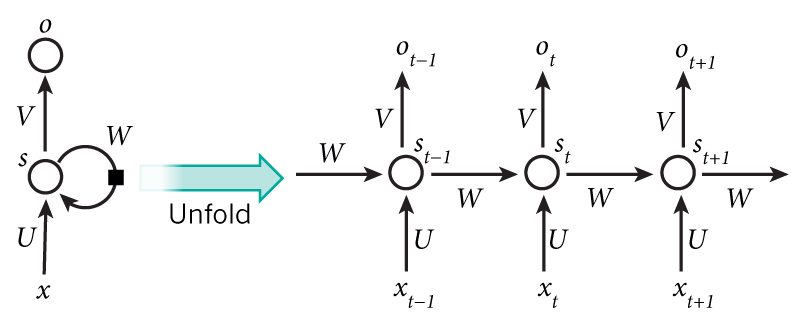

#### RNN的主要问题:
    1、梯度消失
    2、梯度爆炸

#### 最流行的RNN模型：
    1、LSTMs(Long Short-Term Memory，长短时记忆模型)模型，还有很多其他的~就....
    2、在LSTMs中，i结构被称为cells，可以把cells看作是黑盒用以保存当前输入xt之前的保存的状态ht−1，这些cells更加一定的条件决定哪些cell抑制哪些cell兴奋。它们结合前面的状态、当前的记忆与当前的输入。已经证明，该网络结构在对长序列依赖问题中非常有效。LSTMs的网络结构如下图所示:
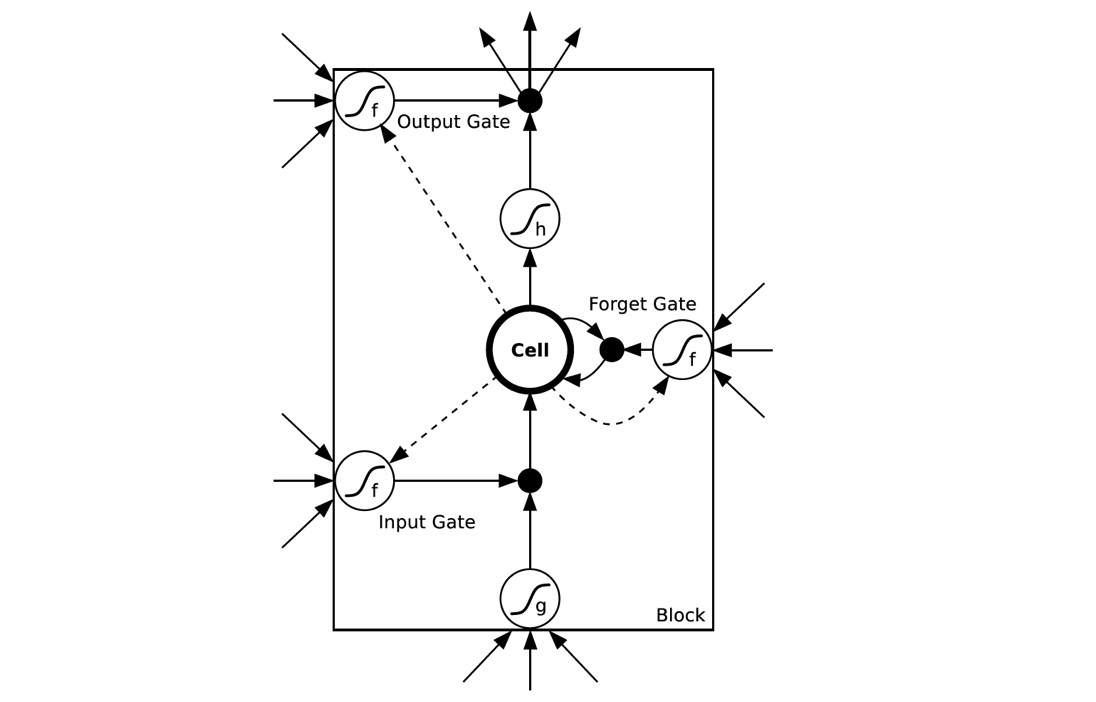

    3、RNN的三个控制器
        a、输入控制，判断是否将当前的信息写入到主线的memory中
        b、输出控制，根据记忆信息和新输入的信息，判断要输出的是什么信息
        c、忘记控制，根据新输入的信息，判断是否忘记保存在主线memory中的部分信息
        
#### RNN的自由性：
    1、处理时间序列
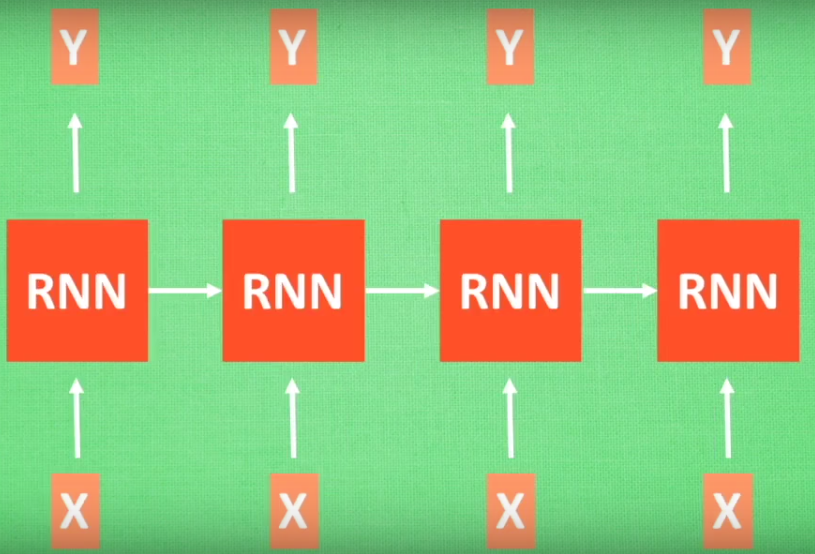

    2、处理分类(一个人说的话是积极的还是消极的)
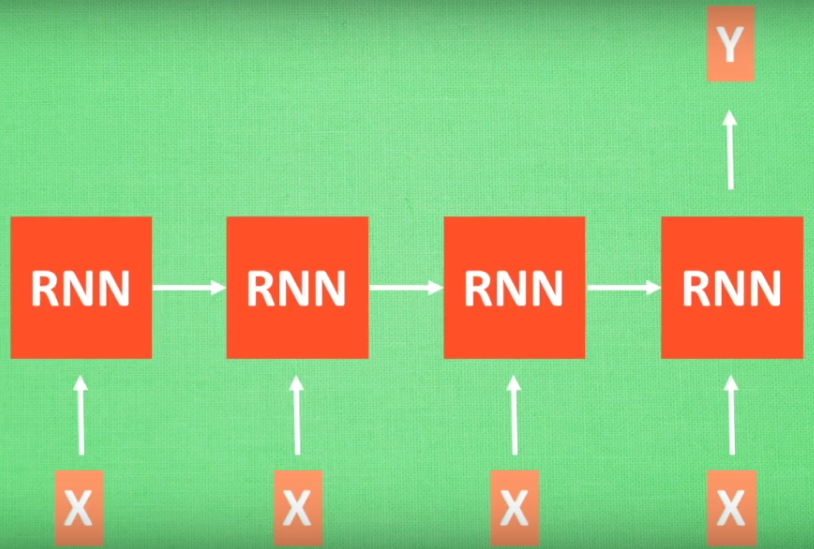

    3、处理图片描述
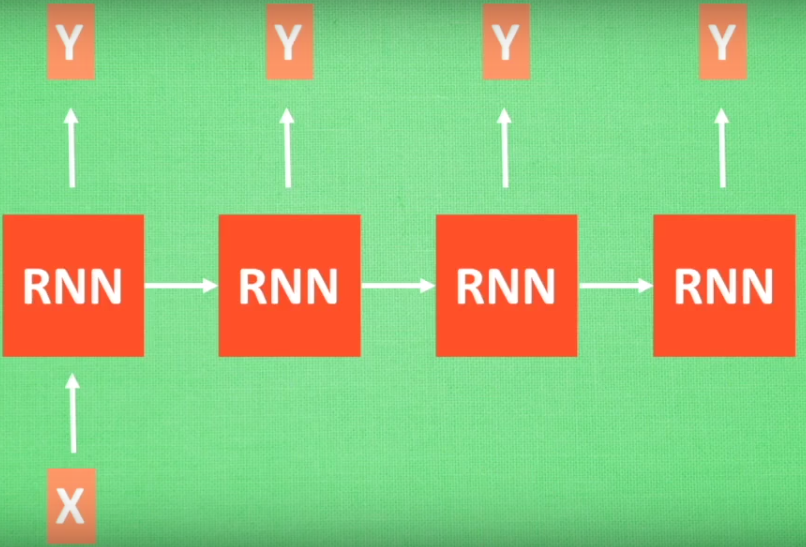

    4、处理语言翻译
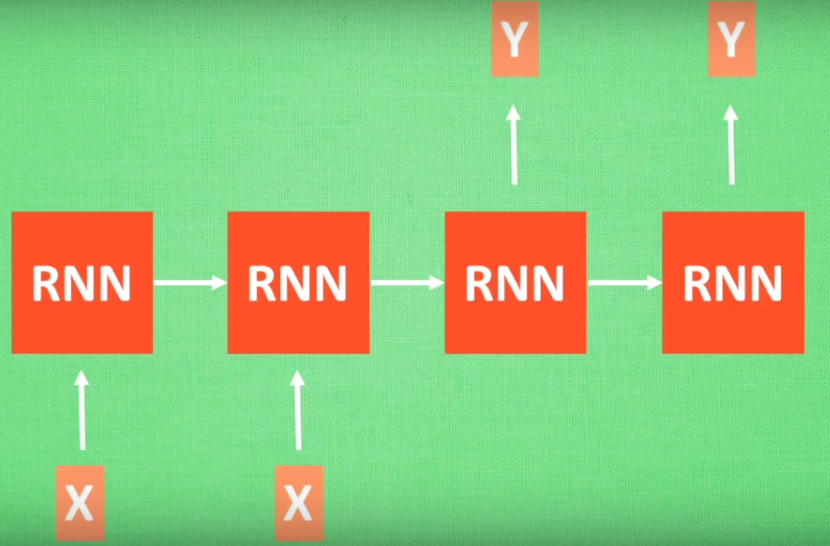

In [2]:
tf.set_random_seed(1)

In [3]:
# 准备数据
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
# 定义超参数
lr = 0.001
training_iters = 100000
batch_size = 128

In [5]:
# 定义各种维度
n_inputs = 28          # img shape 28*28
n_steps = 28           # 以图片的每一行为时间去做处理
n_hidden_units = 128   # 隐藏层神经元数量
n_classes = 10         # 十个分类目标

In [6]:
x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

In [7]:
# weights和biases均有两组，分别用于LSTMcell的前后
weights = {
    # shape(28,128)
    'in': tf.Variable(tf.random_normal([n_inputs, n_hidden_units])),
    # shape(128,10)
    'out': tf.Variable(tf.random_normal([n_hidden_units, n_classes]))
}
biases = {
    # shape(128,)
    'in': tf.Variable(tf.constant(0.1, shape=[n_hidden_units, ])),
    # shape(10,)
    'out': tf.Variable(tf.constant(0.1, shape=[n_classes, ]))
}

In [8]:
def RNN(X,weights,biases):
    # 隐藏层，进入cell之前的
    X = tf.reshape(X, [-1, n_inputs])                       # 转换数据shape为(128*28,28)
    X_in = tf.matmul(X, weights['in']) + biases['in']        # 进入cell之前的隐藏层
    X_in = tf.reshape(X_in, [-1, n_steps, n_hidden_units])   # 转换数据shape为(128,28,128)
    
    # cell定义
    cell = tf.contrib.rnn.BasicLSTMCell(n_hidden_units)
    init_state = cell.zero_state(batch_size, dtype=tf.float32)
    
    # cell计算
    outputs, final_state = tf.nn.dynamic_rnn(cell, X_in, initial_state=init_state, time_major=False)    
    
    # 隐藏层，cell计算后给出的分类器作用类似于
    outputs = tf.unstack(tf.transpose(outputs, [1,0,2]))
    results = tf.matmul(outputs[-1], weights['out']) + biases['out'] 
    
    return results

In [9]:
pred = RNN(x, weights, biases)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
train_op = tf.train.AdamOptimizer(lr).minimize(cost)

In [10]:
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [11]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    step = 0
    while step * batch_size < training_iters:
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape([batch_size, n_steps, n_inputs])
        sess.run([train_op], feed_dict={x: batch_xs,y: batch_ys,})
        if step % 20 == 0:
            print(sess.run(accuracy, feed_dict={x: batch_xs,y: batch_ys,}))
        step += 1

0.117188
0.648438
0.75
0.859375
0.875
0.90625
0.875
0.867188
0.867188
0.882813
0.890625
0.882813
0.914063
0.90625
0.921875
0.914063
0.9375
0.960938
0.914063
0.945313
0.960938
0.960938
0.929688
0.976563
0.984375
0.96875
0.953125
0.953125
0.96875
0.9375
0.9375
0.976563
0.960938
0.96875
0.96875
0.960938
0.976563
0.953125
0.992188
0.953125
